# Examen Módulo 1 - Optimización. <font color=blue>Tipo de examen 1</font>.
Tipo de exámen https://drive.google.com/file/d/1aS_7K-InMQOgyQElm4f2Hjz6B5ishZVs/view

Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *E1ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *E1CristianZapata*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

## Primer punto. Optimización de funciones escalares usando `sympy` (30 puntos).

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

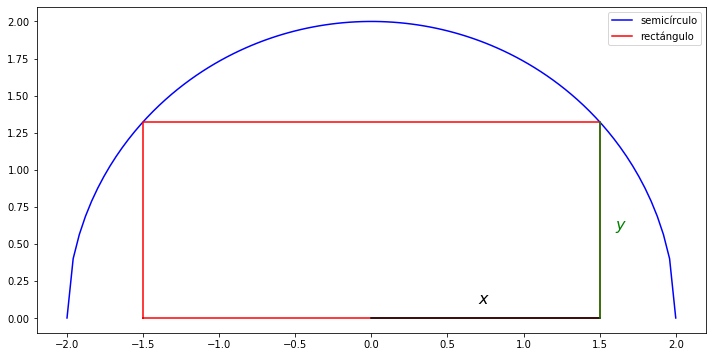

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1 (10 puntos).** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en LaTeX, en celdas Markdown.

**Solución punto 1.**

El área del rectángulo $A_R$ está dada por 

$$A_R = bh$$

Pero como $b = 2x$ y $h=y$ entonces

$$A_R = 2xy$$

La variable $y$ se puede escribir como función de $x$ usando el teorema de pitágoras

$$y = \sqrt{4-x^2}$$

Reemplazando finalmente se tiene que

$$A_R(x) = 2x\sqrt{4-x^2}$$

y el dominio de la función está dado por 

$$Dom_{A_R(x)} = [0,2]$$

**Punto 2 (10 puntos).** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

**Solución punto 2.**

In [3]:
import sympy as sym

In [4]:
sym.var('x')

x

In [5]:
def AR(x):
    return 2*x*(4-x**2)**(1/2)

In [6]:
dAR = sym.diff(AR(x),x)
dAR

-2.0*x**2*(4 - x**2)**(-0.5) + 2*(4 - x**2)**0.5

In [7]:
xc = sym.solve(dAR,x)
xc

[-1.41421356237310, 1.41421356237310]

In [8]:
AR(0), AR(1.4142), AR(2)

(0.0, 3.9999999992642556, 0.0)

El área máximo del rectángulo es $4$ cuando $x = 1.4142$

**Punto 3 (10 puntos).** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

**Solución punto 3.**

Por definición tenemos que $b = 2x$

In [9]:
b = 2*xc[1]
b

2.82842712474619

Para h se tiene que

In [10]:
h = (4-xc[1]**2)**(1/2)
h

1.41421356237309

## Segundo punto. Programación lineal (35 puntos).

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador trabaja cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1 (20 puntos).** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

**Solución punto 1.**

La función a minimiar viene dada por

$$\min_{x_1,\cdots,x_7} = x_1+x_2+x_3+x_4+x_5+x_6+x_7$$

y las restricciones están dadas por la información dada en la tabla

$$x_1+x_4+x_5+x_6+x_7 \geq 14$$
$$x_1+x_2+x_5+x_6+x_7 \geq 13$$
$$x_1+x_2+x_3+x_6+x_7 \geq 15$$
$$x_1+x_2+x_3+x_4+x_7 \geq 16$$

Así se escribe menor o igual $\leq$

In [13]:
A = np.array([[-1,0,0,-1,-1,-1,-1],
             [-1,-1,0,0,-1,-1,-1],
             [-1,-1,-1,0,0,-1,-1],
             [-1,-1,-1,-1,0,0,-1],
             [-1,-1,-1,-1,-1,0,0],
             [0,-1,-1,-1,-1,-1,0],
             [0,0,-1,-1,-1,-1,-1]])
b = np.array([-14,-13,-15,-16,-19,-18,-11])
c = np.array([1,1,1,1,1,1,1])

**Punto 2 (15 puntos).** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [14]:
import scipy.optimize as opt

In [15]:
resultado = opt.linprog(c,A_ub=A,b_ub=b)
resultado

     con: array([], dtype=float64)
     fun: 22.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([0., 4., 0., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([4., 7., 1., 4., 3., 3., 0.])

**Conclusión** En total es necesario 22 trabajadores

## Tercer punto. Ajuste de curvas (35 puntos).

**Enunciado**. El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

**Punto 1 (10 puntos).** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [16]:
import pandas as pd

In [17]:
file_name = 'population_data.csv'
data = pd.read_csv(file_name)
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
5,1955,32906,1377917,407522
6,1956,33978,1427722,368740
7,1957,35095,1485202,414545
8,1958,36253,1447578,404529
9,1959,37448,1589606,396924


**Punto 2 (15 puntos).** Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [18]:
x = data.iloc[:,0].values/1e4
y = data.iloc[:,1].values/1e6

In [19]:
def fun_obj(beta,x,y,n):
    return np.sum((y-beta.dot([x**i for i in range(n+1)]))**2)

In [20]:
b01 = np.zeros(2)
b02 = np.zeros(3)
b03 = np.zeros(4)

ajuste1 = opt.minimize(fun_obj,b01,args=(x,y,1))
ajuste2 = opt.minimize(fun_obj,b02,args=(x,y,2))
ajuste3 = opt.minimize(fun_obj,b03,args=(x,y,3))

In [21]:
ajuste1

      fun: 0.0002121371950321856
 hess_inv: array([[  82.05132861, -413.83986309],
       [-413.83986309, 2087.46463097]])
      jac: array([8.00355338e-10, 1.01863407e-10])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 4
     njev: 10
   status: 0
  success: True
        x: array([-2.9866748 , 15.44006024])

In [22]:
ajuste2

      fun: 0.00021184693362423678
 hess_inv: array([[  71.09615591, -331.93918706, -134.37015914],
       [-331.93918706, 1549.98796332,  627.22590392],
       [-134.37015914,  627.22590392,  254.97863903]])
      jac: array([-8.76752893e-10,  8.19272827e-09, -2.20370566e-08])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 4
     njev: 10
   status: 0
  success: True
        x: array([-2.77506704, 13.3050888 ,  5.38458765])

In [23]:
ajuste3

      fun: 0.00021180513451636628
 hess_inv: array([[  69.98920362, -325.33307692, -131.70728937,  -39.43796249],
       [-325.33307692, 1512.46129184,  612.08672395,  183.29945129],
       [-131.70728937,  612.08672395,  248.87120865,   74.22896075],
       [ -39.43796249,  183.29945129,   74.22896075,   23.22902331]])
      jac: array([-1.22417987e-09,  9.26775101e-09, -2.03617674e-08, -1.59689080e-08])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 4
     njev: 10
   status: 0
  success: True
        x: array([-2.75280714, 13.14309915,  5.31948264,  1.59271617])

In [24]:
xpoints = x*1e4
ypoints = y*1e6

In [31]:
yhat1 = (ajuste1.x[0] + ajuste1.x[1]*xpoints/1e4)*1e6
yhat2 = (ajuste2.x[0] + ajuste2.x[1]*xpoints/1e4 + ajuste2.x[2]*(xpoints/(1e4))**2)*1e6
yhat3 = (ajuste3.x[0] + ajuste3.x[1]*xpoints/1e4 + ajuste3.x[2]*(xpoints/(1e4))**2 + ajuste3.x[3]*(xpoints/(1e4))**3)*1e6

In [26]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Población en miles de personas')

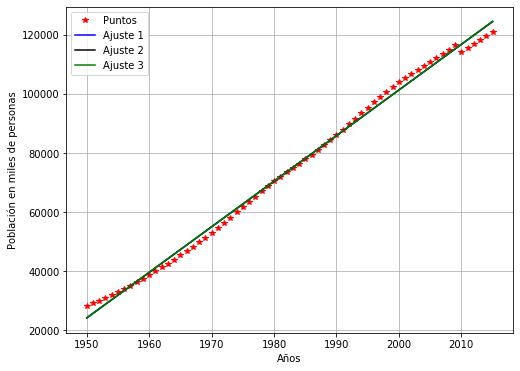

In [27]:
plt.figure(figsize=(8,6))
plt.plot(xpoints,ypoints,'r*',ms = 6,label='Puntos')
plt.plot(xpoints,yhat1,'b',ms = 6,label='Ajuste 1')
plt.plot(xpoints,yhat2,'k',ms = 6,label='Ajuste 2')
plt.plot(xpoints,yhat3,'g',ms = 6,label='Ajuste 3')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Años')
plt.ylabel('Población en miles de personas')

Text(0, 0.5, 'Error')

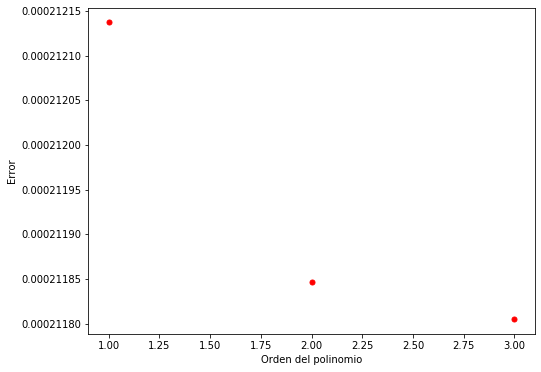

In [28]:
error = [ajuste1.fun,ajuste2.fun,ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4),error,'ro',ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('Error')

*Conclusión*

Según la gráfica anterior, el polinomio que mejor se ajusta es el de tercer orden.

**Punto 3 (10 puntos).** Con los polinomios ajustados en el punto anterior, estime la población en el año 2016 y compare con el dato real 127,5 millones.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

**Solución punto 3.**

In [29]:
yhat1 = (ajuste1.x[0] + ajuste1.x[1]*2016/1e4)*1e6
yhat2 = (ajuste2.x[0] + ajuste2.x[1]*2016/1e4 + ajuste2.x[2]*(2016/(1e4))**2)*1e6
yhat3 = (ajuste3.x[0] + ajuste3.x[1]*2016/1e4 + ajuste3.x[2]*(2016/(1e4))**2 + ajuste3.x[3]*(2016/(1e4))**3)*1e6

yhat1,yhat2,yhat3,127.5

(126041.3458724967, 126082.29168915396, 126089.02356462786, 127.5)

*Conclusión*. El polinomio que mejor estima este dato es el polinomio de grado tres.